# Analysis of Top 50 Spotify Songs of 2019
#### By: Emily Rivas
#### 12/15/20

## Introduction

Launching in 2008, Spotify has transformed music listening since its release. With Spotify, users can access and share over 3.2 million podcasts, 70 million tracks, and other content from creators all over the world. With Spotify premium users can gain access to even more features. 

Today, Apple Music and Spotify are te top music streaming services available. Although apple music is primarily used by iOS/MacOS users, Spotify is the most popular streaming service for users with other devices. Currently, Spotify has 172 million subscribers and
Today, spotify hold the title as the world's most popular music streaming service with 172 million subscribers versus Apple Music's 72 million subscribers. 

Seeing its importance as the leading music service,I will perform data science techniques and computational analysis to analyze the attributes of 2019's top 50 songs on spotify in this tutorial. To be specific, we will be analyzing a songs genre, valence, energy, danceability, loudness, and beats per minutes. Using data science protocols, I hope to leave the audience with a better understanding of music trends and what attributes contribute to that. 

https://newsroom.spotify.com/company-info/

https://www.statista.com/statistics/604959/number-of-apple-music-subscribers/

Before analyzing our data, we must first import Spotify's dataset on the top 50 songs from 2019. I will be using Kaggle's [2019 Spotify Top 50](https://www.kaggle.com/leonardopena/top50spotify2019), which was created based on a songs attributes and its placement on the top 50 chart. The top 50 songs were compiled based on how many streams they have throughout the year of 2019. The characteristics that the dataset describes are.

1. Energy — the higher the value the more energetic.
2. Danceability — Thee higher the value, the easier it is to dance to the song.
3. Beats.Per.Minute — Tempo of the Song.
4. Loudness(dB) — The higher the value, the louder the song.
5. Speechiness — The higher the value the more spoken word the song contains.
6. Track Name — Name of Track
7. Artist Name — Name of the Artist
8. Genre — Genre of Track
9. Liveness — The higher the value, the more likely the song is a live recording.
10. Valence — The higher the value, the more positive mood for the song.
11. Length — The duration of the song.
12. Acousticness - The higher the value the more acoustic the song.
13. Popularity — The higher the value the more popular the song is.

These attributes mainly descibe sound characteristics. This helps spotify give catered playlists to its users, but for my data analysis purposes I want to see if any of these attributes a songs ranking/popularity.

https://medium.com/cuepoint/visualizing-hundreds-of-my-favorite-songs-on-spotify-fe50c94b8af3

## Python Libraries Used
- Tools used in this tutorial:
- Pandas
- Numpy
- Seaborn
- Matplotlib
- Scikit-Learn

In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [141]:
# Load the data into our Pandas Dataframe
df = pd.read_csv('top50.csv', encoding = 'ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


First, gather information on the data set. This includes seeing what the name of the columns are. Also, since we are meant to be analyzing the top 50 songs on spotify, I need to check if there 50 entries and each column has a Non-Null count of exactly 50. Otherwise, we have data that we cannot use for analysis purpose. To further ensure this property, I will do a sum of null in each column, if our data is valid and usable it will have a count of 0 for each column.

In [142]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

For readability purposes, I will  be renaming all my columns so that they can easily be referenced later in the exploratory analysis. To check that my data is being represented as desired, I have printed the first 5 rows of my dataset and the columns have readable names as desired. 

In [144]:
# Rename confusing column names and drop unnecessary columns
df.rename(columns={'Unnamed: 0': 'Rank','Track.Name': 'Track Name'
                   ,'Artist.Name': 'Artist Name','Beats.Per.Minute':'Beats Per Minute'
                   ,'Loudness..dB..': 'Loudness(dB)', 'Valence.': 'Valence'
                   ,'Length.':'Length', 'Acousticness..':'Acousticness'
                   ,'Speechiness.':'Speechiness'}, inplace=True)

# Print the first few entries to check that labels are correct
df.head(5)

,Rank,Track Name,Artist Name,Genre,Beats Per Minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


## Is There a Popular Genre In The Top 50?

No. of Genres:  21


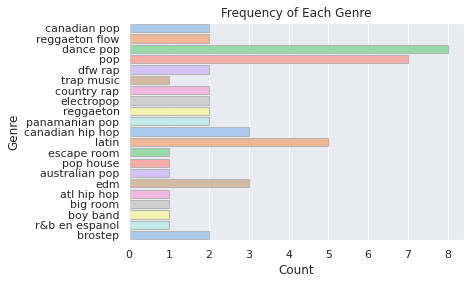

In [266]:
sns.set(font_scale = 1)
plt.figure(figsize = (6,4))
sns.countplot(data = df, y = 'Genre', 
              palette = 'pastel', edgecolor = '.7')
plt.xlabel('Count')
plt.title('Frequency of Each Genre')

n = len(pd.unique(df['Genre']))

print("No. of Genres: ", n)

Frequency plot that shows the count of each song and its corresponding Genre on Top 50 chart. 

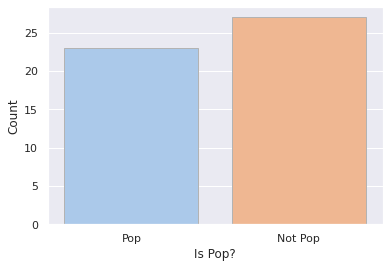

In [274]:
for index, row in df.iterrows():
    Genre = row['Genre']
    
    if 'pop' in Genre:
        Genre = str('Pop')
    else:
        Genre = str('Not Pop')
        
    df.at[index, 'Is Pop?'] = Genre

sns.set(font_scale = 1)
plt.figure(figsize = (6,4))   
ax = sns.countplot(x='Is Pop?', data = df
            , palette = 'pastel', edgecolor = '.7')     
ax = sns.set(font_scale = 1)
plt.ylabel('Count')

ax

With our analysis, we see that many Top 50 songs are a subgenre of Pop. Although there are 21 total genres, the most popular genres are Dance pop and pop at 8 and 7 respectively. To be specific, 23 of the songs on the Top 50 chart are Pop or a subgenre of Pop and the remaining 27 are not pop. Although a majority of the songs aren't pop, a significant portion are which forces consumers to realize the genre's impact. 

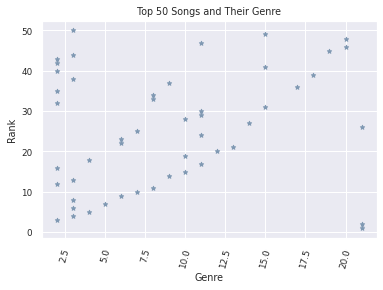

<Figure size 720x1152 with 0 Axes>

In [363]:
sns.set(font_scale = .8)
Color = np.array([.5, .6, .7]).reshape(1,-1)
df.plot(x = "Genre", y = "Rank", kind = "scatter", c= Color,marker = "*")
plt.title('Top 50 Songs and Their Genre') 
plt.xticks(rotation = 75)
plt.xlabel('Genre')
plt.ylabel('Rank')
plt.figure(figsize = (10,16)) 
plt.show()

From the figure above, we can see that Genres vary in terms of where the placement in the Top 50 will be. Thus, none of the genres had a heavy concentration in the higher ranks or the lower ranks. This is because, unlike the genres pop and dance pop, the other genre have close to 1 or 2 songs in the genre alone. Yet, dance pop and pop have up to 7 songs in both of their categories. Still, these songs do not have a heavy concentration towards one end or the other in the Top 50 ranking system. Instead, it has a wide range of values, yet this still shows the heavy presence of the respective pop genres in the Top 50. 

## Were Artists of a Certain Genre More Popular?

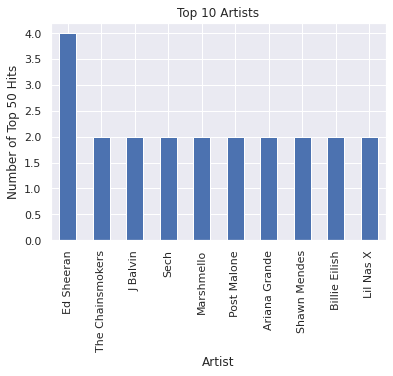

In [284]:
top_artists = df['Artist Name'].value_counts(sort=True)
top_artists = top_artists.head(10)
top_artists.plot(kind='bar', title='Top 10 Artists')
plt.ylabel("Number of Top 50 Hits")
plt.xlabel("Artist")
plt.show()

From this bar graph, we can see that many artists had the same amount of hits at about 2. Yet, one artist in particular surpassed this trend by double the amount. At 4 top 50 hits, Ed Sheeran had the highest number of songs that charted in Spotify's top 50.

In [290]:
# Top 10 Artist information
a1 = df.loc[df['Artist Name'] == 'Ed Sheeran']
a2 = df.loc[df['Artist Name'] == 'The Chainsmokers']
a3 = df.loc[df['Artist Name'] == 'J Balvin']
a4 = df.loc[df['Artist Name'] == 'Sech']
a5 = df.loc[df['Artist Name'] == 'Marshmello']
a6 = df.loc[df['Artist Name'] == 'Post Malone']
a7 = df.loc[df['Artist Name'] == 'Ariana Grande']
a8 = df.loc[df['Artist Name'] == 'Shawn Mendes']
a9 = df.loc[df['Artist Name'] == 'Billie Eilish']
a10 = df.loc[df['Artist Name'] == 'Lil Nas X']

print(a1[['Genre','Artist Name']])
print(a2[['Genre','Artist Name']])
print(a3[['Genre','Artist Name']])
print(a4[['Genre','Artist Name']])
print(a5[['Genre','Artist Name']])
print(a6[['Genre','Artist Name']])
print(a7[['Genre','Artist Name']])
print(a8[['Genre','Artist Name']])
print(a9[['Genre','Artist Name']])
print(a10[['Genre','Artist Name']])

   Genre Artist Name
3    pop  Ed Sheeran
5    pop  Ed Sheeran
37   pop  Ed Sheeran
49   pop  Ed Sheeran
   Genre       Artist Name
30   edm  The Chainsmokers
48   edm  The Chainsmokers
    Genre Artist Name
16  latin    J Balvin
29  latin    J Balvin
             Genre Artist Name
13  panamanian pop        Sech
36  panamanian pop        Sech
      Genre Artist Name
45  brostep  Marshmello
47  brostep  Marshmello
      Genre  Artist Name
4   dfw rap  Post Malone
17  dfw rap  Post Malone
        Genre    Artist Name
2   dance pop  Ariana Grande
31  dance pop  Ariana Grande
           Genre   Artist Name
0   canadian pop  Shawn Mendes
25  canadian pop  Shawn Mendes
         Genre    Artist Name
9   electropop  Billie Eilish
24  electropop  Billie Eilish
          Genre Artist Name
8   country rap   Lil Nas X
21  country rap   Lil Nas X


In this chart, I have printed the artist name alongside the genre of their top 50 song. Looking at this chart, I immediatley see that five out of ten of the artists are pop artists or work in some subgenre of pop. An observation that particularly stuck out was Ed Sheeran being a pop artist. As one of the biggest artists of 2019 and being of the pop genre, I can see that the most popular artists of 2019 are pop artists. 

## Do Popular Songs Have Specific Features?

<AxesSubplot:title={'center':'Correlation heatmap'}>

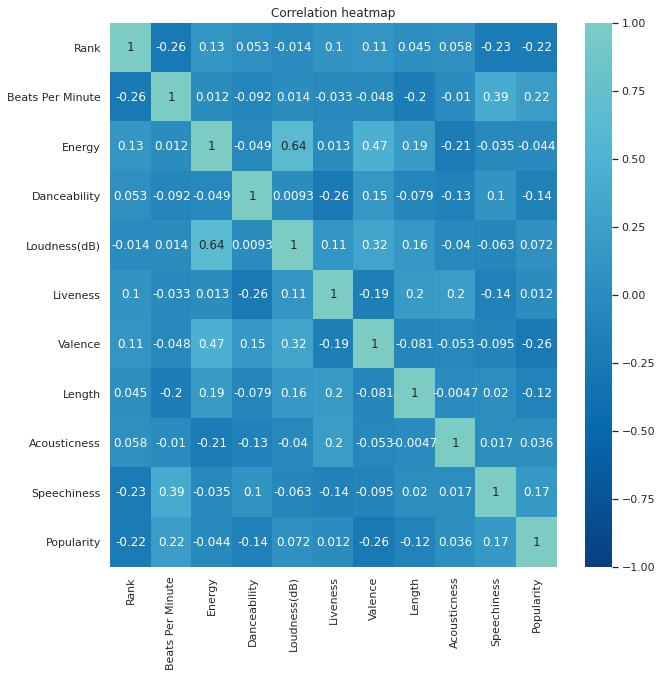

In [282]:
# Get the correlation matrix for characteristics of songs
corr = df.corr(method='spearman')

# Visualize the matrix through a correlation heatmap
plt.figure(figsize=(10,10))
sns.set(font_scale = 1)
plt.title('Correlation heatmap')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='GnBu_r', center=1)

From the correlation heatmap, we see that some features of a song have no correlation. Yet, there are some features that have a moderation correlation that should be analyzed further. These features include: Energy and Loudness, Energy and Valence, and BPM and Valence. Most importantly, we see that there is not a high correlation (<= .5) between popularity and rank and the features listed in our matrix. Yet, these are all popular songs since they are in the top 50 so we will be analyzing these features as they relate to the top 50 chart. 

Seeing as they have a high correlation, I want to further explore these attributes and whether they have a trend within themselves in the Spotify top 50 chart.

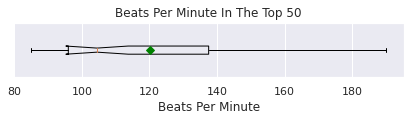

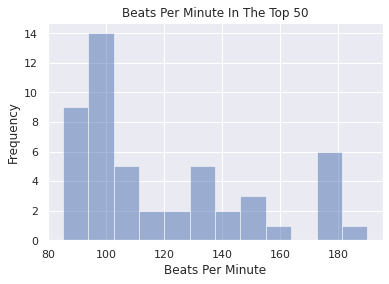

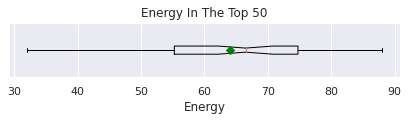

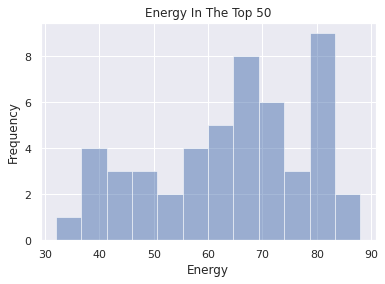

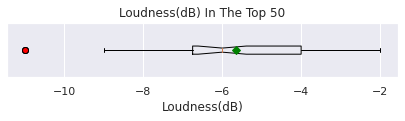

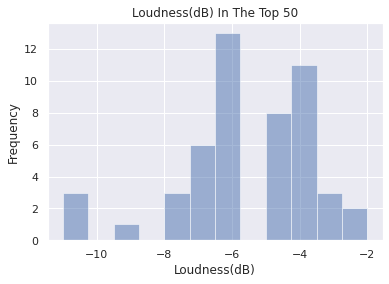

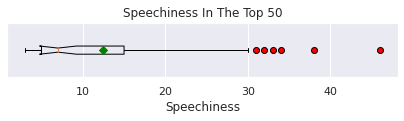

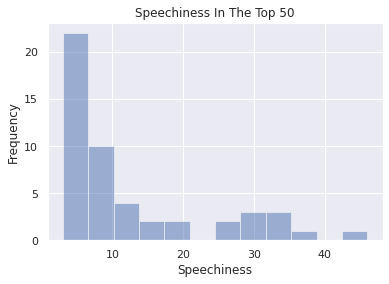

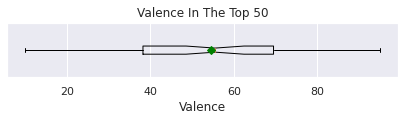

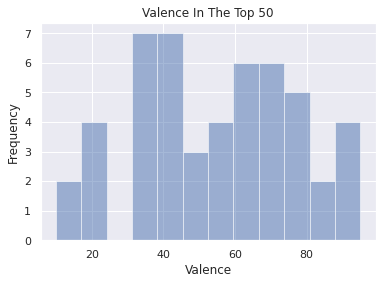

In [283]:
cols = ['Beats Per Minute', 'Energy', 'Loudness(dB)', 'Speechiness', 'Valence']

for var in cols:
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
    plt.figure(figsize = (7,1))
    plt.boxplot(x=df[var], vert=False, flierprops=red_circle
                , showmeans=True, meanprops=mean_shape, notch = True);
    figure = plt.gca()
    y_axis = figure.axes.get_yaxis()
    y_axis.set_visible(False)
    plt.xlabel(var)
    plt.title(var + " In The Top 50")
    plt.show()

    sns.set(font_scale = 1)
    plt.figure(figsize = (6,4))
    df[var].plot.hist(bins=12, alpha=0.5)

    plt.xlabel(var)
    plt.title(var + ' In The Top 50')
    plt.show()

From the histogram above, we can see that many songs in the top 50 tends to have a lower speechiness. For thise that don't know speechiness holds a value inbetween 0.0 and 100.0. The closer to 100.0, the more spoken words there are in a song. For 2019, we see that many of the songs have a lower speechiness, resulting in a left tail for our histogram. Furthermore, our boxplot has a lot of data on the left side of the boxplot with a few outliers that lie on the right side of the box plot.

From the histogram above, we can see that many songs in the top 50 have a high energy. In the histogram, many songs had energy's in the range 65-70 and 80-85. Thus, many of the songs in Spotify's top 50 have a high energy. From the box plot, this is futher verified where the mean is at 65 and many of the values are concentrated around this value point. We can infer that popular music in 2019 tends to be more energetic.

From the histogram above, we can see that songs in the top 50 tend to have a BPM within the range of 90-150. This is because our histogram skews to the left with much of its data concentrated in the range 90-150. 

From our histogram and boxplot, we can see that valence skews towards the right, yet there are still several songs which skew to the left. Thus, mamy of the songs range from both a high valence (e.g. happy, cheerful, euphoric) and low valence (e.g. sad, depressed, angry). Still, since a majority of our data is skewed to the right or lies in the middle of our boxplot, we can say that to top 50 songs of 2019 tend to sound "happier", "more cheerful", or "more euphoric".

From our histogram and boxplot, I can see that most of my data centers around -5.5 dB. Although, some songs in the top 50 skew towards the right up to 0.

In [338]:
# Create our linear regression model
reg = LinearRegression()

In [339]:
df_copy = df.copy()
# Separate our data into predictor variables and the data to be predicted
x = df_copy[['Beats Per Minute', 'Energy'
             , 'Danceability', 'Loudness(dB)', 'Valence']]
y = df_copy[['Popularity']]

In [348]:
# Separate each group into training and testing data sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1)

In [349]:
# Fit the Regression Model and check the score to see performance
reg.fit(x_train, y_train)
accuracy_score = reg.score(x_test, y_test)
accuracy_score

-0.7989494768690537

From our linear regression model, we got a coefficient of determination at .7989. Since our coefficient of determination is relativly close to a value of 1.0 we can say that there is some correlation between the features: Beats Per Minute, Energy, Danceability, Loudness, and Valence ro popularity. This makes sense since we saw from earlier observations that the song attributes become concentrated towards one area of data.

## Conclusion
After analyzing the top 50 spotify charts for 2019, I have come to several conclusions. First, I found that many songs in the Top 50 chart tend to be pop or some derrivation of pop. Although the majority of songs weren't pop, there was still some relationship between genre and popular songs that had to be recognized. Furthermore, with the use of classifiers, I was able to observe that Genre didn't have the strongest correlation to popularity, yet it did have some relation that should be recognized. 

Also, certain attributes were found to have a strong correlation between that and popularity. These attributes included: Beats per minutes, danceability, loudness, valence, and Energy. Furthermore, these attributes tended to become concentrated towards a range of data values that showed that popular songs were more upbeat in the Top 50. With the use of classifiers, I was able to see that these attributes also haad a strong correlation to popularity, which made sense since many songs in the Top 50 were upbeat. 

## References
https://newsroom.spotify.com/company-info/

https://www.statista.com/statistics/604959/number-of-apple-music-subscribers/

https://medium.com/cuepoint/visualizing-hundreds-of-my-favorite-songs-on-spotify-fe50c94b8af3
